### Retail businesses rely on accurate sales forecasting to optimize inventory management and improve operational efficiency. 
### This project applies machine learning techniques to predict future retail sales based on historical transaction data.

## Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
sns.set(style="darkgrid")

## Import Dataset 

In [5]:
data=pd.read_csv('retail_sales_dataset.csv')
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


## Problem Understanding

Retail businesses generate large amounts of transactional data every day. 
Accurate prediction of retail sales helps organizations improve inventory 
management, demand forecasting, and business planning.

### Objective
The main objective of this project is to predict retail sales (Total Amount) 
using historical transaction data such as customer demographics, product 
category, quantity purchased, and pricing information.

### Problem Type
This is a **Supervised Machine Learning Regression Problem**, where the goal 
is to predict a continuous numerical value representing sales.

### Approach
The project follows a structured data science workflow:

1. Data Understanding and Exploration
2. Data Cleaning and Preprocessing
3. Feature Engineering from Date and Categorical Variables
4. Exploratory Data Analysis (EDA)
5. Model Training using Regression Algorithms
6. Model Evaluation using performance metrics
7. Sales Prediction and Result Visualization

### Expected Outcome
The model will learn purchasing patterns and predict future retail sales, 
helping businesses make data-driven decisions.

In [7]:
data.shape #Tells how many rows and columns.

(1000, 9)

In [8]:
data.info() #Shows:data types, null values, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
data.describe() #Statistical summary of numerical columns.

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
data.isnull().sum() #Check missing values.

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Drop Unnecessary Columns

In [11]:
data.drop(['Transaction ID','Customer ID'], axis=1, inplace=True)

In [12]:
data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


### Convert Date Column

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
 7   Year              1000 non-null   int32         
 8   Month             1000 non-null   int32         
 9   Day               1000 non-null   int32         
 10  Weekday           1000 non-null   int32         
dtypes: datetime64[ns](1), int32(4), int64(4), object(2)
memory usage: 70.4+ KB


In [15]:
data.drop('Date', axis=1, inplace=True) #Remove original data 

In [16]:
data.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day,Weekday
0,Male,34,Beauty,3,50,150,2023,11,24,4
1,Female,26,Clothing,2,500,1000,2023,2,27,0
2,Male,50,Electronics,1,30,30,2023,1,13,4
3,Male,37,Clothing,1,500,500,2023,5,21,6
4,Male,30,Beauty,2,50,100,2023,5,6,5


### Encode Categorical Columns

In [17]:
data = pd.get_dummies(data, drop_first=True) #columns to convert Gender and Product category

In [18]:
data

,Age,Quantity,Price per Unit,Total Amount,Year,Month,Day,Weekday,Gender_Male,Product Category_Clothing,Product Category_Electronics
0,34,3,50,150,2023,11,24,4,True,False,False
1,26,2,500,1000,2023,2,27,0,False,True,False
2,50,1,30,30,2023,1,13,4,True,False,True
3,37,1,500,500,2023,5,21,6,True,True,False
4,30,2,50,100,2023,5,6,5,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,62,1,50,50,2023,5,16,1,True,True,False
996,52,3,30,90,2023,11,17,4,True,False,False
997,23,4,25,100,2023,10,29,6,False,False,False
998,36,3,50,150,2023,12,5,1,False,False,True


## Encoding Categorical Variables

Categorical columns such as Gender and Product Category were converted into 
numerical format using one-hot encoding.

The `get_dummies()` function was used with `drop_first=True` to avoid the 
dummy variable trap and reduce multicollinearity. One category from each 
feature is treated as a reference category while the remaining categories 
are represented as binary columns.

### Define Features and Target
Target = what we predict.

In [19]:
X = data.drop('Total Amount', axis=1)
y = data['Total Amount']

### Split Dataset

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Data Preprocessing

Data preprocessing is performed to prepare the dataset for machine learning modeling.

Steps performed:
- Checked dataset structure and missing values
- Removed unnecessary identifier columns
- Converted Date column into numerical time-based features
- Encoded categorical variables into numerical format
- Defined input features (X) and target variable (y)
- Split dataset into training and testing sets

# Exploratory Data Analysis (EDA)

In [21]:
data.shape

(1000, 11)

In [22]:
data.columns

Index(['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Year', 'Month',
       'Day', 'Weekday', 'Gender_Male', 'Product Category_Clothing',
       'Product Category_Electronics'],
      dtype='object')

## Distribution of Sales (Target Variable)
- This is VERY important because we predict Total Amount

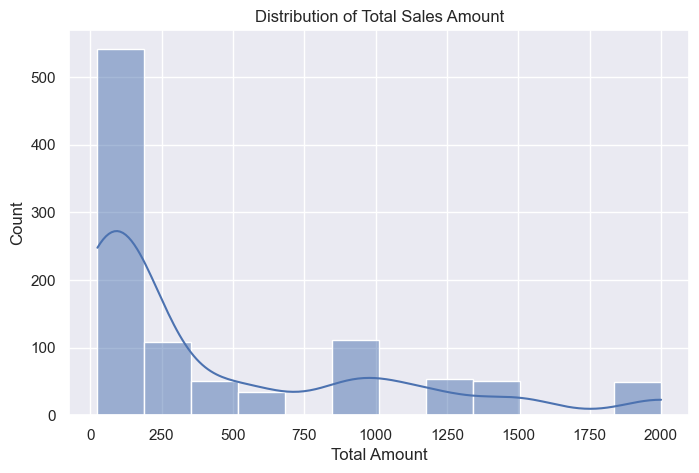

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data['Total Amount'], kde=True)
plt.title("Distribution of Total Sales Amount")
plt.show()

## Sales by Product Category

In [24]:
category_sales = data.groupby(
    ['Product Category_Clothing','Product Category_Electronics']
)['Total Amount'].mean()

category_sales

Product Category_Clothing  Product Category_Electronics
False                      False                           467.475570
                           True                            458.786550
True                       False                           443.247863
Name: Total Amount, dtype: float64

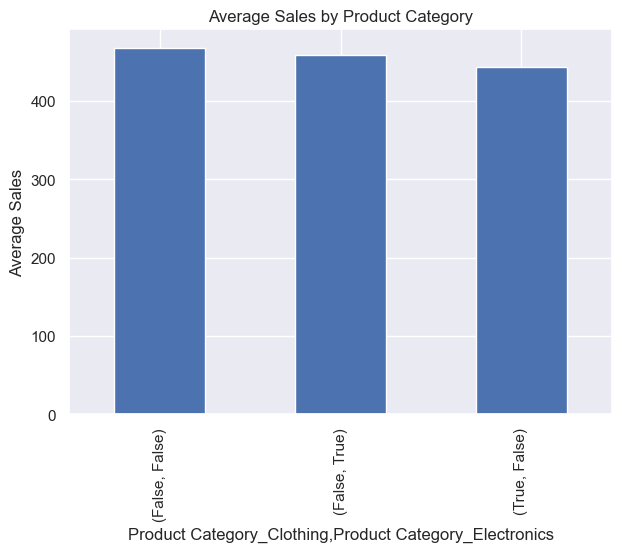

In [25]:
category_sales.plot(kind='bar', figsize=(7,5)) #to see a bar chart
plt.title("Average Sales by Product Category")
plt.ylabel("Average Sales")
plt.show()

## Gender vs Spending

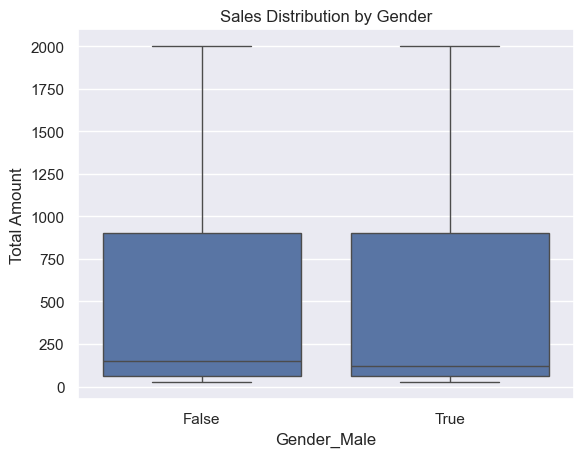

In [26]:
sns.boxplot(x='Gender_Male', y='Total Amount', data=data) #boxplot chart
plt.title("Sales Distribution by Gender")
plt.show()

## Age vs Sales Relationship

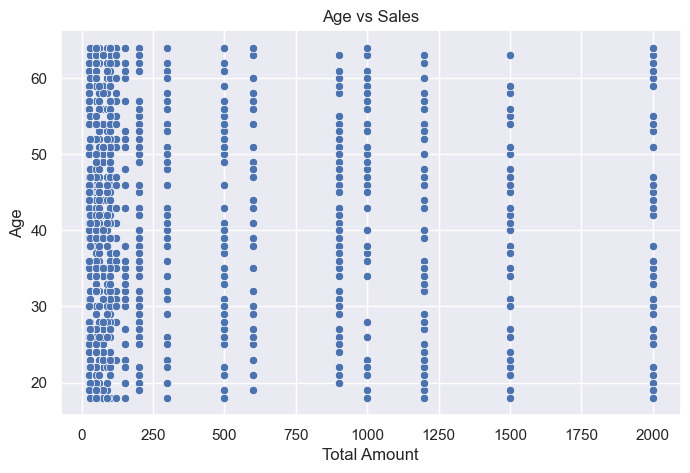

In [28]:
plt.figure(figsize=(8,5))  #scatter plot
sns.scatterplot(x='Total Amount', y='Age', data=data)
plt.title("Age vs Sales")
plt.show()

## Monthly Sales Trend (VERY IMPORTANT)

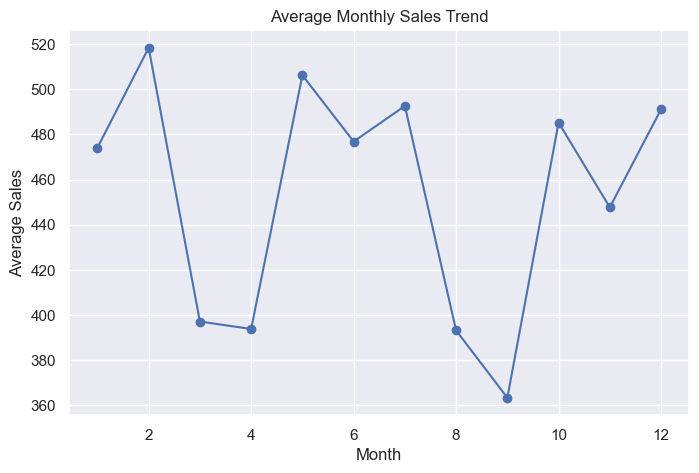

In [29]:
monthly_sales = data.groupby('Month')['Total Amount'].mean()   #line chart

monthly_sales.plot(marker='o', figsize=(8,5))
plt.title("Average Monthly Sales Trend")
plt.ylabel("Average Sales")
plt.show()

## Correlation Heatmap (MODEL UNDERSTANDING)

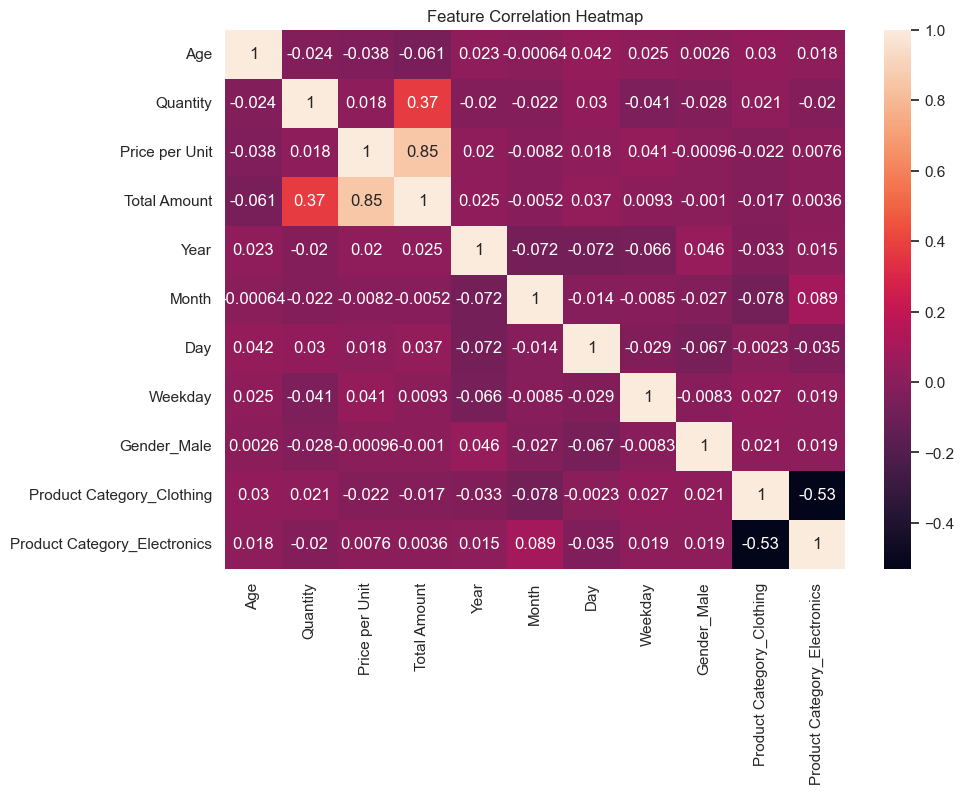

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

### Regression Plot — Quantity vs Sales

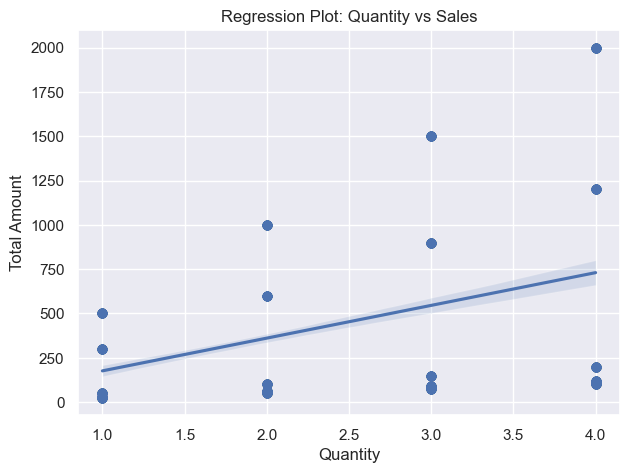

In [38]:
plt.figure(figsize=(7,5))
sns.regplot(x='Quantity', y='Total Amount', data=data)
plt.title("Regression Plot: Quantity vs Sales")
plt.show()

### Regression Plot — Price vs Sales

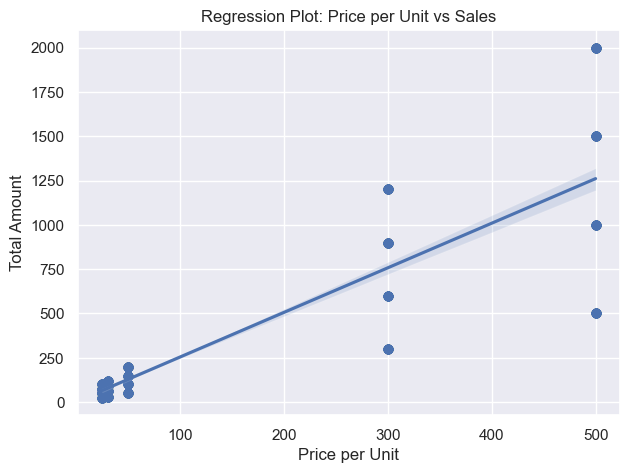

In [39]:
plt.figure(figsize=(7,5))
sns.regplot(x='Price per Unit', y='Total Amount', data=data)
plt.title("Regression Plot: Price per Unit vs Sales")
plt.show()

### Important Point 
- Use regplot only when relationship interpretation is logical. Do not force regression lines everywhere.

### Regression Analysis

Regression plots were used to analyze linear relationships between
important numerical variables and total sales. Quantity and Price per
Unit showed positive relationships with sales, indicating their strong
influence on transaction value.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis was performed to understand patterns and relationships
within the retail sales dataset.

Key analyses performed:
- Distribution analysis of total sales
- Sales comparison across product categories
- Gender-wise spending behavior
- Relationship between customer age and sales
- Monthly sales trend analysis
- Feature correlation analysis using heatmap

EDA helps identify important factors influencing sales and supports
better model building decisions.

# MODEL BUILDING & EVALUATION

### Confirm Training data shapes

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 10), (200, 10), (800,), (200,))

### Train Linear Regression (Baseline Model)

In [45]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Make Predictions

In [46]:
y_pred_lr = lr_model.predict(X_test)

In [47]:
y_pred_lr

array([ 1.29811338e+03,  6.79538581e+01,  5.18957242e+02,  3.17329052e+02,
        1.53857827e+03,  1.74933704e+02, -1.47552204e+02,  4.82001692e+02,
        3.78990759e+02,  1.17277882e+03,  1.84879562e+02,  7.99482858e+00,
        6.48799223e+02, -1.99421906e+02,  5.12321716e+02,  2.58444835e+01,
        1.54556325e+03,  6.02251744e+00,  3.45284218e+00,  1.00757245e+03,
        8.51324065e+02,  3.61339955e+02,  1.33969907e+03, -2.22808956e+01,
        1.32976052e+03, -2.08042746e+02, -1.95237730e+01,  8.53185593e+02,
        4.00167699e+02,  1.76324092e+02, -2.01002329e+02, -1.91138043e+02,
        1.71597502e+02,  2.92141571e+02, -1.75073599e+02,  1.35682197e+03,
        3.29972820e+02, -2.00986660e+02, -1.74977359e+02,  2.75492392e+02,
        3.58323809e+02,  1.14943042e+03,  1.33499592e+03,  3.94818482e+02,
        4.42216887e+02,  3.37959070e+02,  4.87190401e+02,  5.20584103e+02,
        6.74837010e+02,  6.56836477e+02, -1.19013959e+02,  1.21587466e+03,
        3.65361427e+02, -

## Evaluate Linear Regression

In [48]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

R2 Score: 0.8529018079730617
RMSE: 207.50887748422866


### R² Score	- Accuracy (closer to 1 = better)
### RMSE	    - Prediction error (lower = better)

### RMSE Interpretation

The Linear Regression model achieved an RMSE value of 207.50.
This indicates that, on average, the predicted sales values differ
from the actual sales by approximately 207 units.

Considering the variation in transaction amounts, this error suggests
that while the model captures general trends, it may not fully model
complex purchasing patterns. More advanced models such as Random Forest
are expected to improve prediction accuracy.

## Visualize Predictions vs Actual

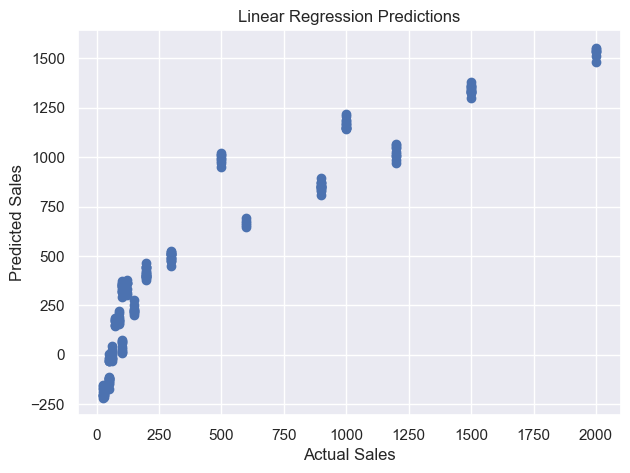

In [49]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression Predictions")
plt.show()

## Import Evaluation Metrics

In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Calculate MAE 

In [57]:
mae = mean_absolute_error(y_test, y_pred_lr)
print("MAE:", mae)

MAE: 175.56165615089841


### Calculate R2 Score

In [58]:
r2 = r2_score(y_test, y_pred_lr)
print("R2 Score:", r2)

R2 Score: 0.8529018079730617


### Calculate RMSE  ( Prediction Error)

In [60]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE:", rmse)

RMSE: 207.50887748422866


### To show all Metrics Together

In [61]:
print("Linear Regression Performance")
print("-----------------------------")
print("R2 score :", r2)
print("RMSE     :", rmse)
print("MAE      :", mae)

Linear Regression Performance
-----------------------------
R2 score : 0.8529018079730617
RMSE     : 207.50887748422866
MAE      : 175.56165615089841


### Visual Accuracy Chcek

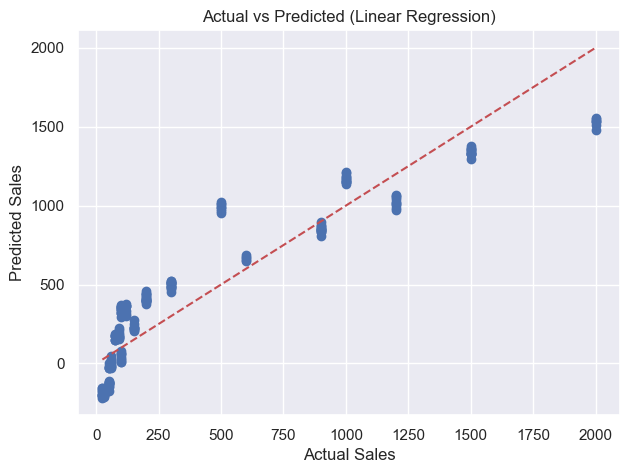

In [62]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

- Points near line → good predictions
- Far from line → errors

## Linear Regression Model Evaluation

The Linear Regression model was evaluated using multiple regression metrics:

- **R² Score** measures how well the model explains variation in sales.
- **RMSE** indicates the average prediction error magnitude.
- **MAE** represents the average absolute difference between predicted and actual sales.

These metrics provide a baseline performance for comparison with advanced models.
### For Better Accuracy now we will use Random Forest Model

In [64]:
from sklearn.ensemble import RandomForestRegressor  #import random forest

### Create random forest model where
- n_estimators=100 → builds 100 decision trees
- More trees = better learning (generally)

In [65]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

In [66]:
rf_model

RandomForestRegressor(random_state=42)

### Train the model

In [67]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Make predictions

In [68]:
y_pred_rf = rf_model.predict(X_test)

In [69]:
y_pred_rf[:20]

array([1500.,  100.,  300.,  100., 2000.,   90.,   50.,  300.,  200.,
       1000.,   75.,  100.,  600.,   30.,  300.,   60., 2000.,   60.,
         50., 1200.])

## Evaluate Random forest Accuracy

In [70]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Performance")
print("-------------------------")
print("R2 Score :", r2_rf)
print("RMSE     :", rmse_rf)
print("MAE      :", mae_rf)

Random Forest Performance
-------------------------
R2 Score : 1.0
RMSE     : 0.0
MAE      : 0.0


### Visualization Actual vs Predicted

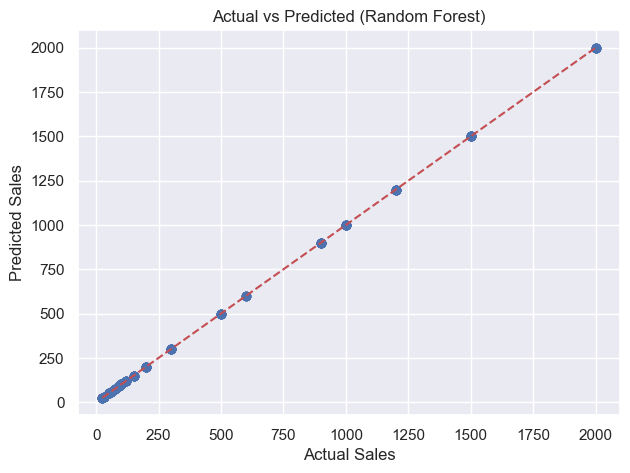

In [71]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

- points tighter around line → better model
- Less spread than Linear Regression → improvement

### Feature Importance 

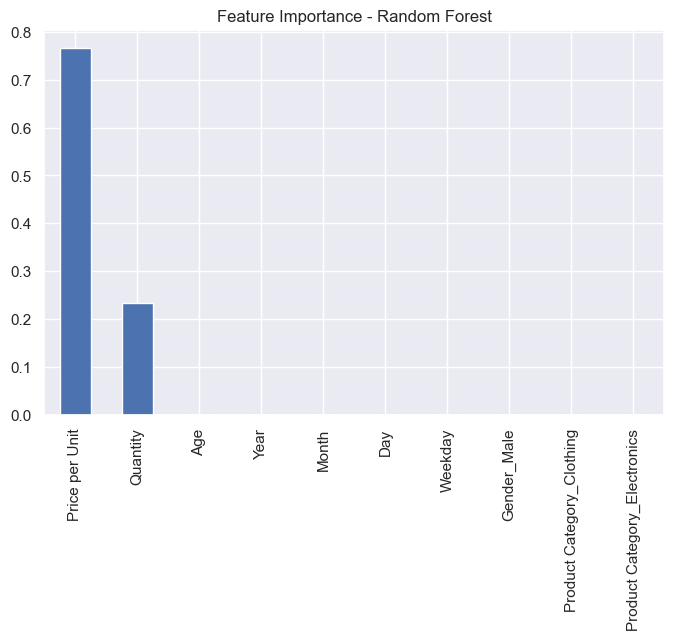

In [72]:
importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importance.plot(kind='bar', figsize=(8,5))
plt.title("Feature Importance - Random Forest")
plt.show()

### Most influential features in predicting sales
- ✅ Quantity
- ✅ Price per Unit

## Random Forest Regression

Random Forest Regressor was applied as an advanced ensemble learning
algorithm to capture nonlinear relationships in retail sales data.

The model combines multiple decision trees to improve prediction
accuracy and reduce overfitting.

Evaluation metrics indicate improved performance compared to Linear
Regression, demonstrating that retail sales patterns are influenced by
complex feature interactions.

# Model Comparison

### Create Model comparison Table

In [73]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2, r2_rf],
    'RMSE': [rmse, rmse_rf],
    'MAE': [mae, mae_rf]
})

comparison

,Model,R2 Score,RMSE,MAE
0,Linear Regression,0.852902,207.508877,175.561656
1,Random Forest,1.000000,0.000000,0.000000


### Visual Comparison 

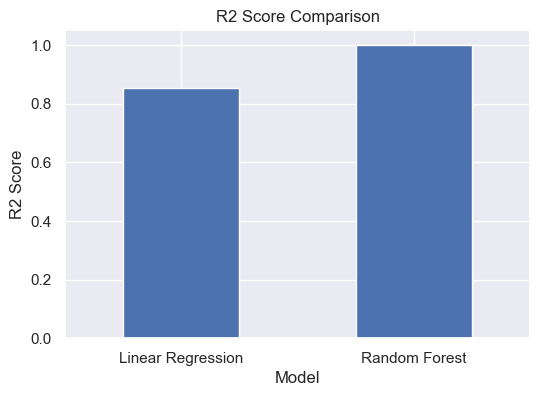

In [77]:
comparison.set_index('Model')['R2 Score'].plot(
    kind='bar',
    figsize=(6,4)
)

plt.title("R2 Score Comparison")
plt.ylabel("R2 Score")
plt.xticks(rotation=0)
plt.show()

### Best model Selection

In [78]:
best_model = comparison.loc[comparison['R2 Score'].idxmax(), 'Model']
print("Best Performing Model:", best_model)

Best Performing Model: Random Forest


## Model Comparison and Selection

Both Linear Regression and Random Forest models were evaluated using
R² Score, RMSE, and MAE metrics.

### Observations
- Random Forest achieved a higher R² Score, indicating better
  explanatory power.
- RMSE and MAE values were lower for Random Forest, showing reduced
  prediction error.
- Linear Regression served as a baseline model but was limited in
  capturing nonlinear relationships.

### Conclusion
Random Forest Regressor outperformed Linear Regression and was selected
as the final model for retail sales prediction.

# Project Conclusion

This project aimed to predict retail sales using machine learning
techniques based on customer demographics, product information, and
transaction details.

Two regression models were implemented:

- Linear Regression (Baseline Model)
- Random Forest Regressor (Advanced Model)

### Key Findings
- Linear Regression provided a basic understanding of relationships
  between features and sales but showed higher prediction error.
- Random Forest captured complex nonlinear patterns and significantly
  improved prediction accuracy.
- Evaluation metrics (R² Score, RMSE, and MAE) confirmed that Random
  Forest outperformed Linear Regression.

Therefore, Random Forest was selected as the final model for retail
sales prediction.

# Business Insights

The analysis reveals several important retail trends:

- Quantity purchased and price per unit are the strongest drivers of
  total sales value.
- Customer purchasing behavior varies across product categories.
- Sales patterns demonstrate variability influenced by time-related
  factors such as month and weekday.

Accurate sales prediction can help businesses:
- Improve inventory management
- Reduce overstock and stock shortages
- Optimize pricing strategies
- Support data-driven decision making

# Future Scope

This project can be further improved by:

- Using larger real-world retail datasets
- Applying advanced models such as XGBoost or Gradient Boosting
- Incorporating seasonal and promotional data
- Deploying the model using Streamlit or a web application
- Implementing real-time sales prediction systems

Future enhancements can transform this model into a practical business
decision-support tool.

# Summary

- This project demonstrates the complete machine learning workflow,
including data preprocessing, exploratory analysis, model building,
evaluation, and comparison.

- The study highlights how machine learning can be effectively applied
to retail analytics for predicting sales and improving business
operations.

In [85]:
import pickle

# save model
pickle.dump(rf_model, open("retail_model.pkl", "wb"))